In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
file = './data_output/merged_ticket_bar.csv'

df = pd.read_csv(file, parse_dates=["Datum"], dayfirst=True)

/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_1173/2430973867.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, parse_dates=["Datum"], dayfirst=True)


In [8]:
df['first_event_date_start'] = pd.to_datetime(df['first_event_date_start'])
df['last_event_date_end'] = pd.to_datetime(df['last_event_date_end'])

In [11]:
filtered = df[(df['Datum'] >= df['first_event_date_start']) & (df['Datum'] <= df['last_event_date_end'])]

In [12]:
filtered["Dag"] = filtered['Datum'].dt.date
filtered["Uur"] = filtered['Datum'].dt.hour

In [17]:
# omzet_uur_dag = filtered.groupby(["Dag", "Uur"])["Aantal * prijs"].sum().reset_index()
gem_omzet_uur = filtered.groupby("Uur")["Aantal * prijs"].mean().reset_index()
# std_omzet_uur = omzet_uur_dag.groupby("Uur")["Aantal * prijs"].std()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x600 with 0 Axes>

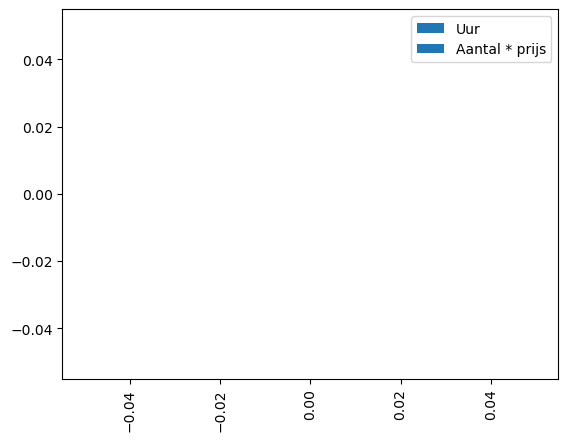

In [18]:
plt.figure(figsize=(10, 6))
gem_omzet_uur.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Gemiddelde omzet per uur", fontsize=16)
plt.xlabel("Uur van de dag", fontsize=14)
plt.ylabel("Gemiddelde omzet (€)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# plt.errorbar(gem_omzet_uur.index, gem_omzet_uur, yerr=error, fmt='none', ecolor='red', capsize=5)

plt.show()